In [237]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [238]:

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [239]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:
test_data = pd.read_csv("test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [241]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women), print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


(None, None)

In [242]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Data Preprocessing Steps
A. Categorical Data

Text(0.5, 0, 'Age (years)')

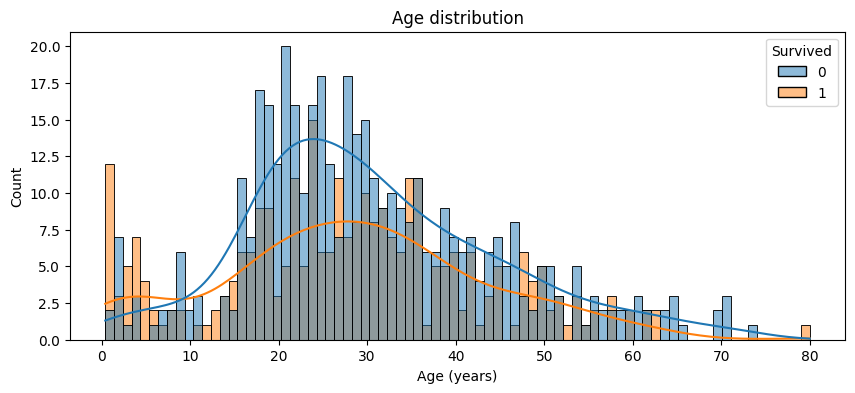

In [243]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train_data, x='Age', hue='Survived', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_20404/856576606.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_data.loc[train_data['Age']<=12,'Age_group']='Age_0-12'
/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_20404/856576606.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data.loc[test_data['Age']<=12,'Age_group']='Age_0-12'


Text(0.5, 1.0, 'Age group distribution')

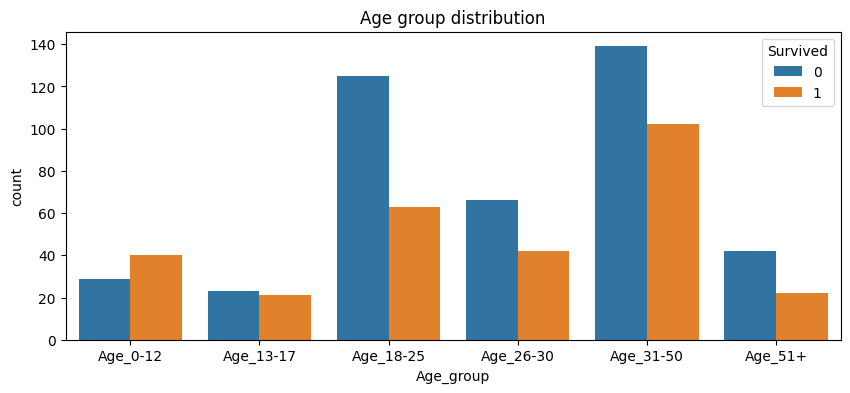

In [244]:
# New features - training set
train_data['Age_group']=np.nan
train_data.loc[train_data['Age']<=12,'Age_group']='Age_0-12'
train_data.loc[(train_data['Age']>12) & (train_data['Age']<18),'Age_group']='Age_13-17'
train_data.loc[(train_data['Age']>=18) & (train_data['Age']<=25),'Age_group']='Age_18-25'
train_data.loc[(train_data['Age']>25) & (train_data['Age']<=30),'Age_group']='Age_26-30'
train_data.loc[(train_data['Age']>30) & (train_data['Age']<=50),'Age_group']='Age_31-50'
train_data.loc[train_data['Age']>50,'Age_group']='Age_51+'

# New features - test set
test_data['Age_group']=np.nan
test_data.loc[test_data['Age']<=12,'Age_group']='Age_0-12'
test_data.loc[(test_data['Age']>12) & (test_data['Age']<18),'Age_group']='Age_13-17'
test_data.loc[(test_data['Age']>=18) & (test_data['Age']<=25),'Age_group']='Age_18-25'
test_data.loc[(test_data['Age']>25) & (test_data['Age']<=30),'Age_group']='Age_26-30'
test_data.loc[(test_data['Age']>30) & (test_data['Age']<=50),'Age_group']='Age_31-50'
test_data.loc[test_data['Age']>50,'Age_group']='Age_51+'

# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=train_data, x='Age_group', hue='Survived', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

Age groups younger than 18 are more likely to survive than older age groups

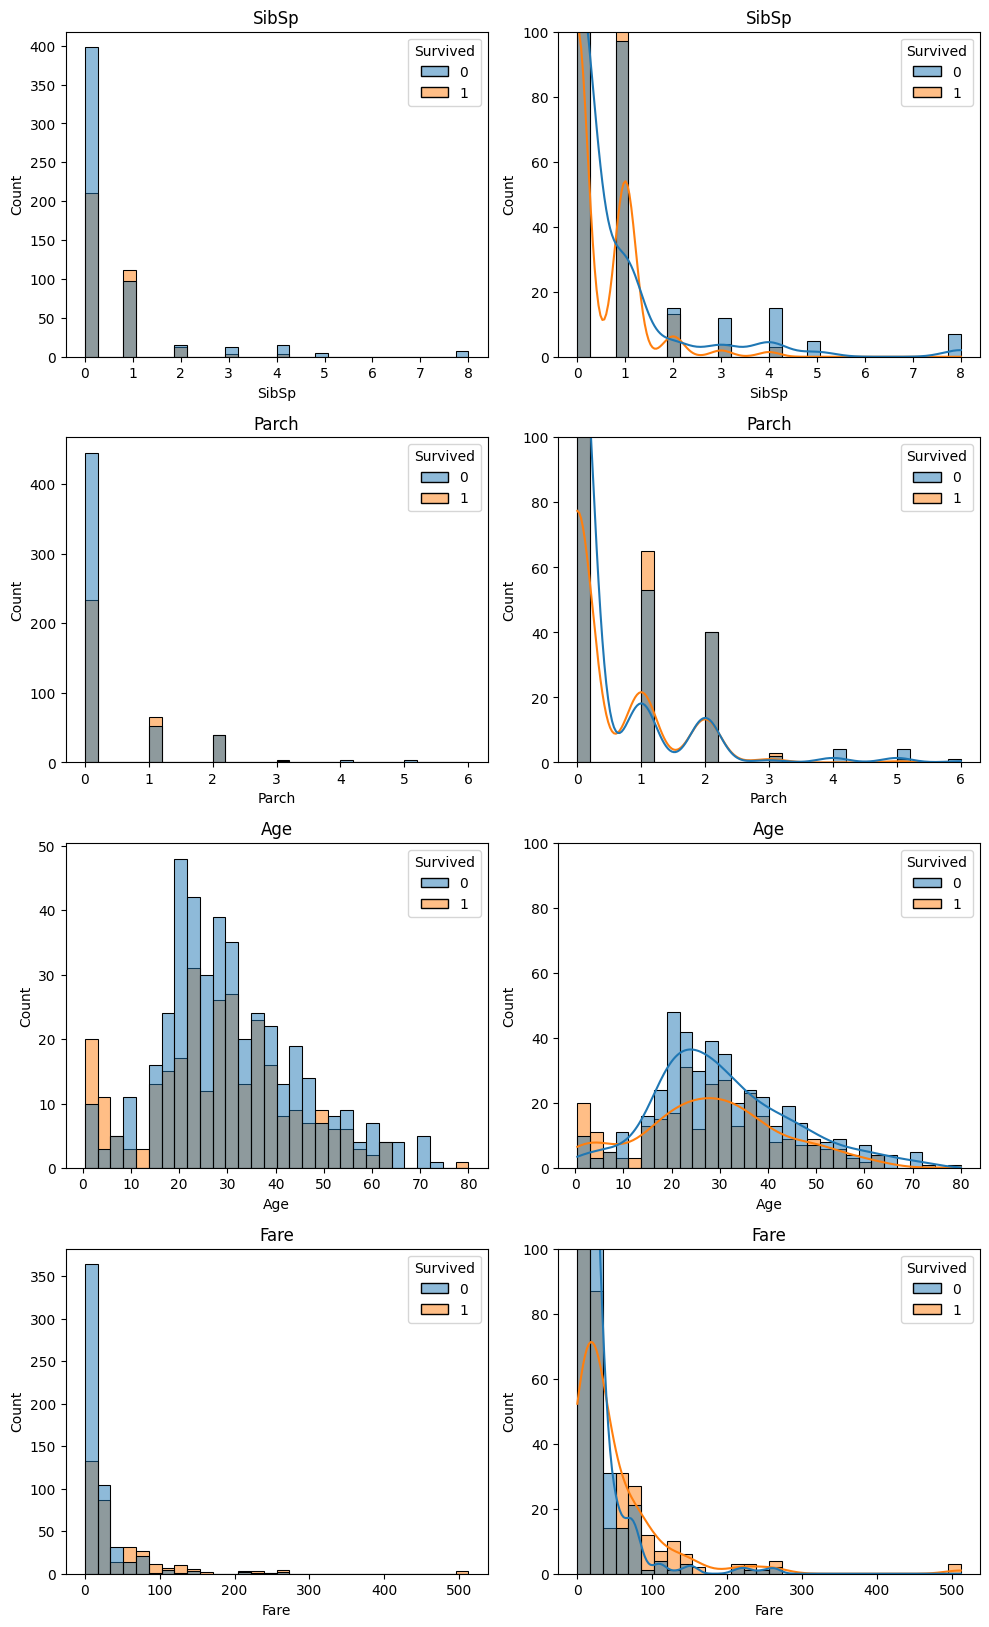

In [245]:
# Expenditure features
numfeatures = ["SibSp", "Parch", "Age", "Fare"]

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(numfeatures):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_data, x=var_name, axes=ax, bins=30, kde=False, hue='Survived')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_data, x=var_name, axes=ax, bins=30, kde=True, hue='Survived')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()



- sibsp and parch survive correlation may have to do with sex ratios for those w/ or w/o children or spouses
- 20s-30s less likely to survive
- Less fare = less likely to survive

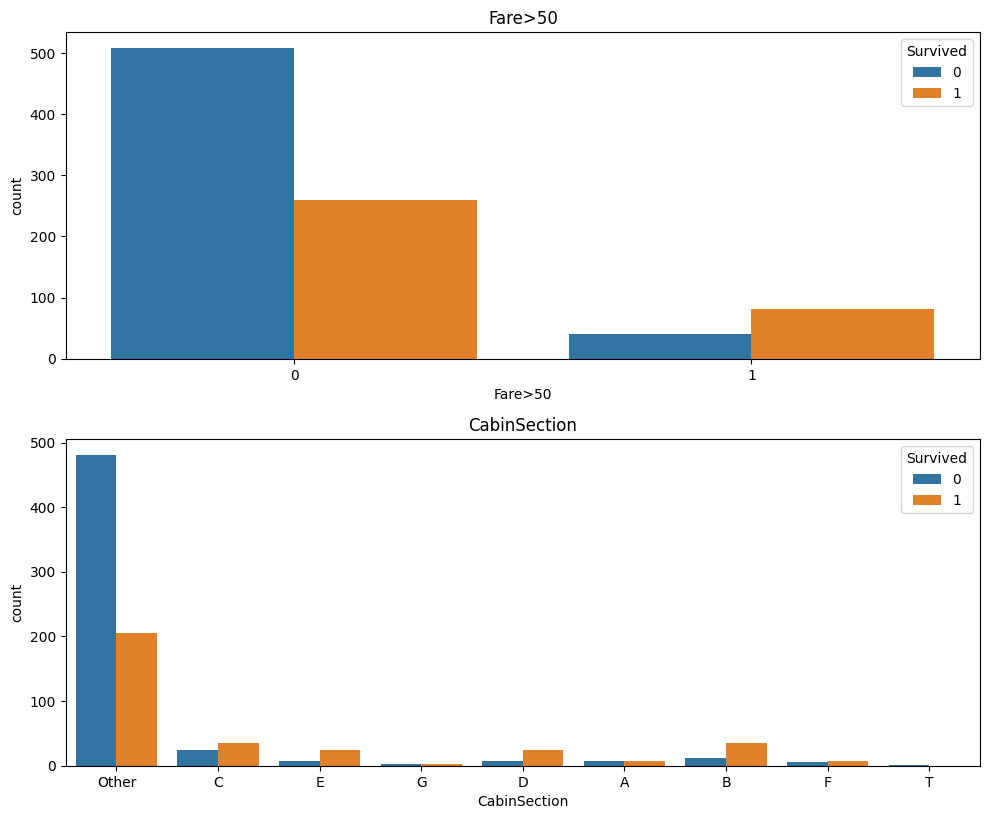

In [246]:
train_data['Fare>50'] = train_data['Fare'].apply(lambda x: 1 if x > 60 else 0)
train_data['CabinSection'] = train_data['Cabin'].apply(lambda x: 'Other' if pd.isna(x) else x[0])

test_data['CabinSection'] = test_data['Cabin'].apply(lambda x: 'Other' if pd.isna(x) else x[0])

# Plot Group data on fare
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(['Fare>50', 'CabinSection']):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_data, x=var_name, axes=ax, hue='Survived')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Cabin Section survivability seems to have a disparity between none and the other cabins, Too much missing cabin information

In [247]:
# Remove temp data, mainly for visualization

train_data = train_data.drop(['Fare>50'], axis=1)
train_data = train_data.drop(['CabinSection'], axis=1)
test_data = test_data.drop(['CabinSection'], axis=1)

In [248]:
train_data['Title'], test_data['Title'] = [df.Name.str.extract \
        (' ([A-Za-z]+)\.', expand=False) for df in [train_data, test_data]]
train_data.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_20404/1351697313.py:2: SyntaxWarning: invalid escape sequence '\.'
  (' ([A-Za-z]+)\.', expand=False) for df in [train_data, test_data]]


mean  count
Title    Pclass                  
Capt     1       70.000000      1
Col      1       58.000000      2
Countess 1       33.000000      1
Don      1       40.000000      1
Dr       1       43.750000      4
         2       38.500000      2
Jonkheer 1       38.000000      1
Lady     1       48.000000      1
Major    1       48.500000      2
Master   1        5.306667      3
         2        2.258889      9
         3        5.350833     24
Miss     1       30.000000     45
         2       22.390625     32
         3       16.123188     69
Mlle     1       24.000000      2
Mme      1       24.000000      1
Mr       1       41.580460     87
         2       32.768293     82
         3       28.724891    229
Mrs      1       40.882353     34
         2       33.682927     41
         3       33.515152     33
Ms       2       28.000000      1
Rev      2       43.166667      6
Sir      1       49.000000      1

In [249]:
TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

train_data['Title'], test_data['Title'] = [df.Title.map(TitleDict) for df in [train_data, test_data]]

##There is Dona which is royalty which is not covered in test_data. Update the same
test_data.at[414,'Title'] = 'Royalty'

##Let us now reprint the groups
train_data.groupby(['Title','Sex', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title   Sex    Pclass                  
Master  male   1        5.306667      3
               2        2.258889      9
               3        5.350833     24
Miss    female 1       29.744681     47
               2       22.390625     32
               3       16.123188     69
Mr      male   1       41.580460     87
               2       32.768293     82
               3       28.724891    229
Mrs     female 1       40.400000     35
               2       33.547619     42
               3       33.515152     33
Officer male   1       56.600000      5
Royalty female 1       43.333333      3
        male   1       42.166667      6
               2       42.000000      8

In [250]:
grp = train_data.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]

train_data['Age'], test_data['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in [train_data, test_data]]

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Age_18-25,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Age_31-50,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_26-30,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Age_31-50,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Age_31-50,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Age_26-30,Royalty
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Age_18-25,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16.123188,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Age_26-30,Mr


Used the association with Title and PClass to predict the ages of NaN age individuals

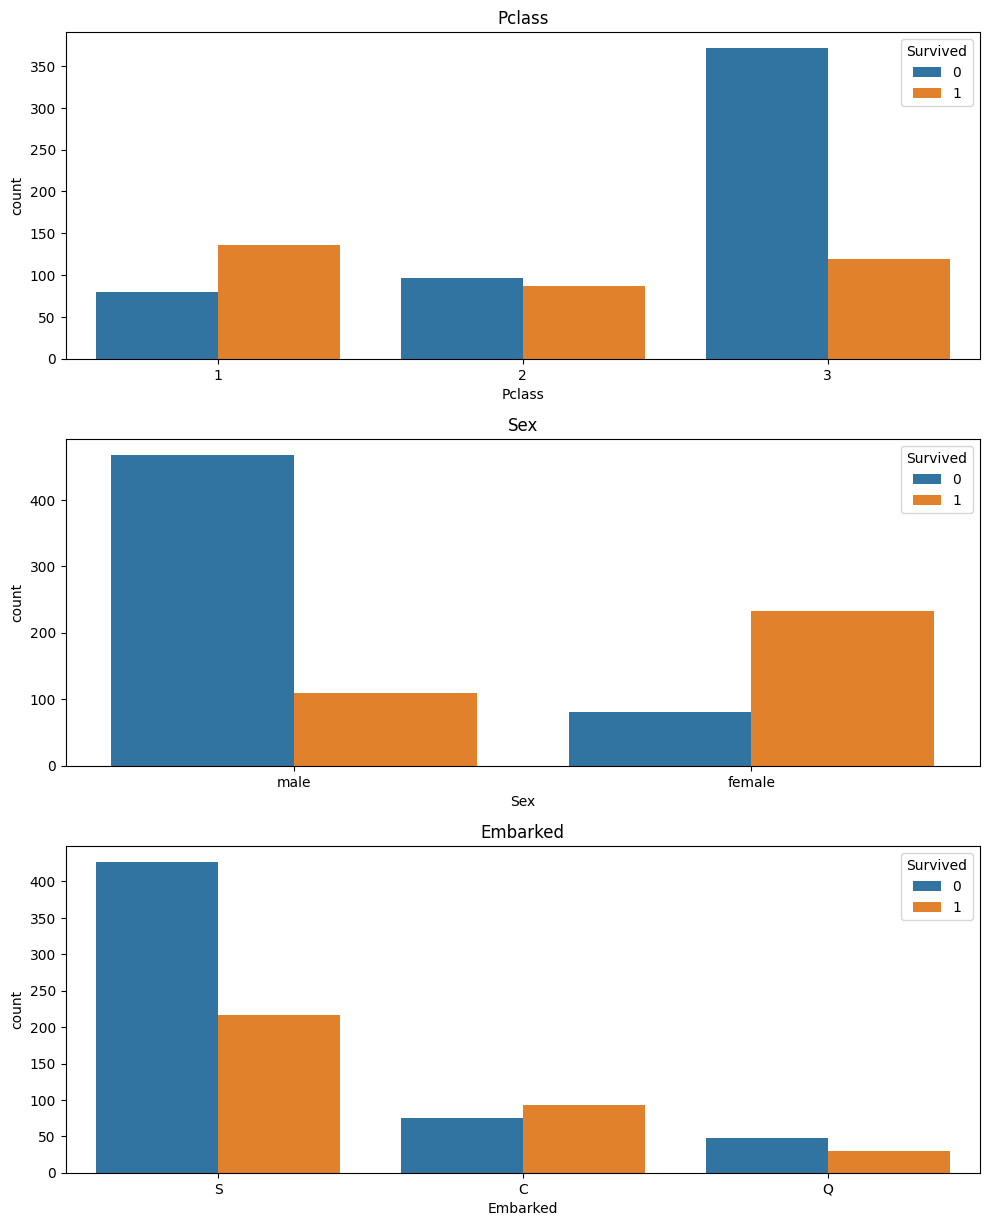

In [251]:
# Categorical features
cat_feats=['Pclass', 'Sex', 'Embarked']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_data, x=var_name, axes=ax, hue='Survived')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

- 1st class more likely to survive than 3rd
- male vs female survivability disparity
- Cherbourg more likely to survivie for whatever reason

In [252]:
# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
train_data[qual_feats].head()

#PassengerID likely unnecessary, Cabin has potential

,PassengerId,Cabin,Name
0,1,NaN,"Braund, Mr. Owen Harris"
1,2,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,NaN,"Heikkinen, Miss. Laina"
3,4,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,NaN,"Allen, Mr. William Henry"


Noting missing values, primarily age and cabin values are missing

It was seen that cabin section seems to matter, but theres too much missing data.
I read name titles are important, those will be incorporated

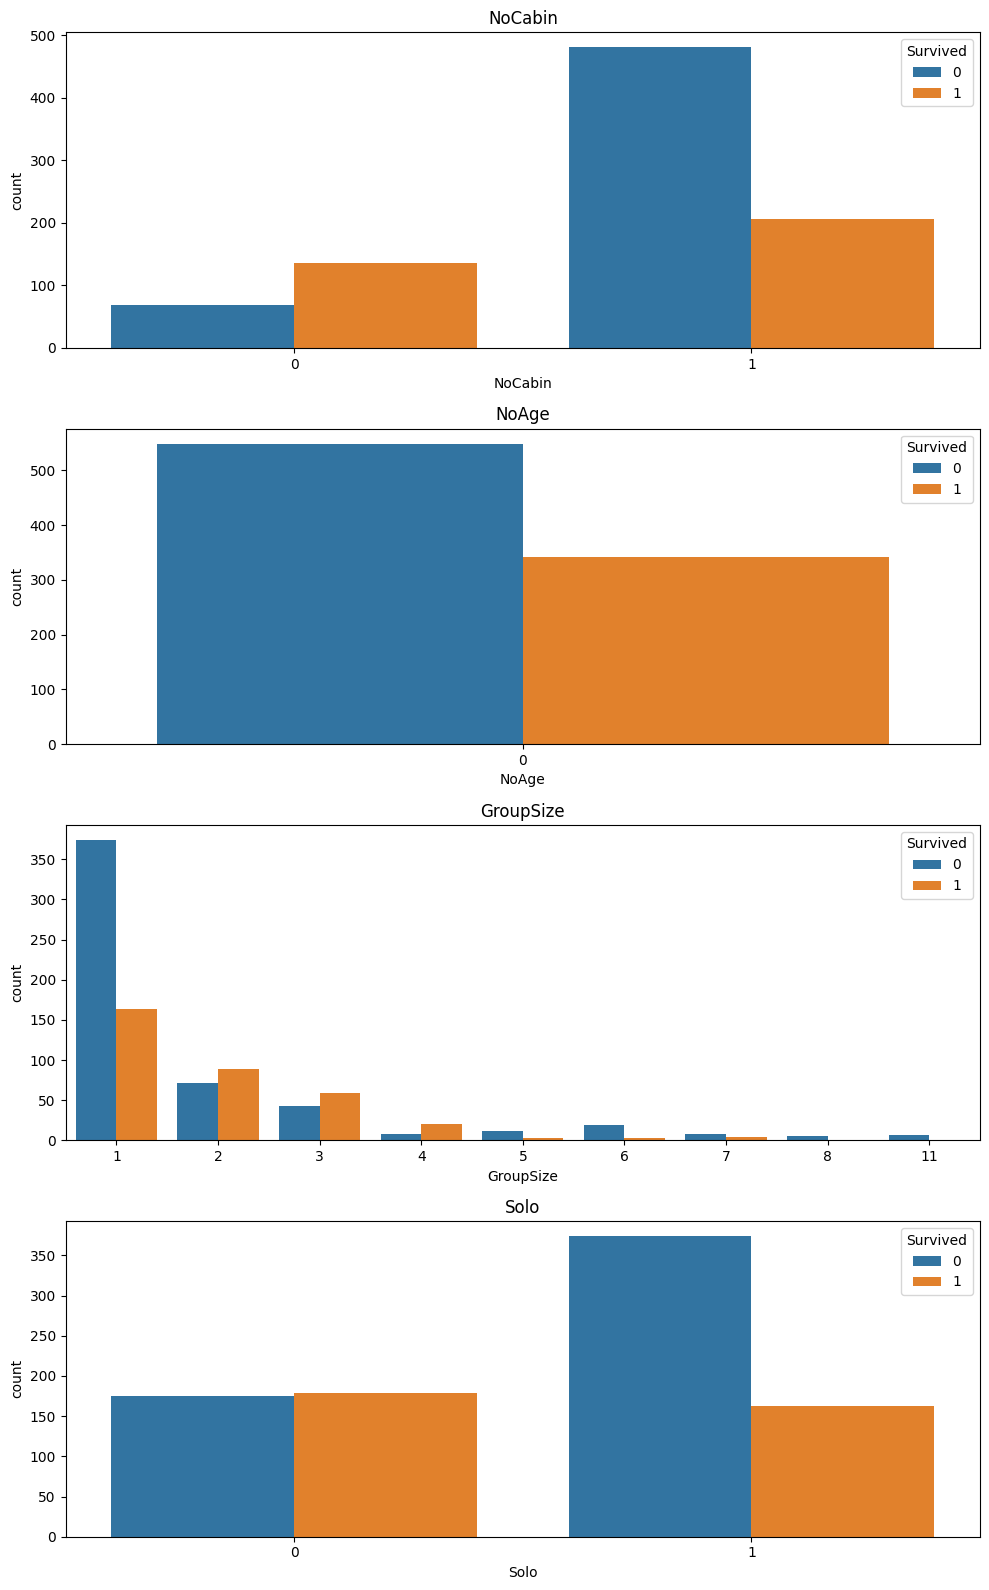

In [253]:
# New features - training set
train_data['NoCabin']=(pd.isna(train_data['Cabin'])).astype(int)
test_data['NoCabin']=(pd.isna(train_data['Cabin'])).astype(int)
train_data['NoAge']=(pd.isna(train_data['Age'])).astype(int)

# New feature
train_data['GroupSize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['GroupSize'] = test_data['SibSp'] + test_data['Parch'] + 1

train_data['Solo']=(train_data['GroupSize']==1).astype(int)
test_data['Solo']=(train_data['GroupSize']==1).astype(int)

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(['NoCabin', 'NoAge', 'GroupSize', 'Solo']):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_data, x=var_name, axes=ax, hue='Survived')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

- Those with no Cabin Survived extensively less!
- Those with no age survived slightly less, proportional to that of those with ages
- Solo travellers survived less than those who travelled together (children and possibly women far more likely to travel with others)

In [254]:
train_data = train_data.drop(['NoAge'], axis=1)

B

In [255]:

y = train_data["Survived"].copy().astype(int)
X_process = train_data.drop(['PassengerId', 'Survived','Name', 'Ticket', 'Cabin', 'Age_group', 'SibSp', 'Parch', 'Solo', 'Title'], axis=1).copy()
X_process_test = test_data.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Age_group', 'SibSp', 'Parch', 'Solo', 'Title'], axis=1).copy()



X_process.isnull().sum().sort_values(ascending=False)

# Concatenate dataframes
X_process = pd.get_dummies(data=X_process)
X_process_test = pd.get_dummies(data=X_process_test)
X_process


,Pclass,Age,Fare,NoCabin,GroupSize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,7.2500,1,2,False,True,False,False,True
1,1,38.000000,71.2833,0,2,True,False,True,False,False
2,3,26.000000,7.9250,1,1,True,False,False,False,True
3,1,35.000000,53.1000,0,2,True,False,False,False,True
4,3,35.000000,8.0500,1,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,1,1,False,True,False,False,True
887,1,19.000000,30.0000,0,1,True,False,False,False,True
888,3,16.123188,23.4500,1,4,True,False,False,False,True
889,1,26.000000,30.0000,0,1,False,True,True,False,False


Impute unfilled data, use the median for continuous values

In [256]:
from sklearn.impute import SimpleImputer


def impute(x):
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    imp.fit(x)
    return pd.DataFrame(data=imp.transform(x), columns=x.columns)  

X_process = impute(X_process)
X_process_test = impute(X_process_test)
X_process_test


,Pclass,Age,Fare,NoCabin,GroupSize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,34.500000,7.8292,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,3.0,47.000000,7.0000,0.0,2.0,1.0,0.0,0.0,0.0,1.0
2,2.0,62.000000,9.6875,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,27.000000,8.6625,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,3.0,22.000000,12.2875,1.0,3.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,3.0,28.724891,8.0500,1.0,1.0,0.0,1.0,0.0,0.0,1.0
414,1.0,39.000000,108.9000,1.0,1.0,1.0,0.0,1.0,0.0,0.0
415,3.0,38.500000,7.2500,1.0,1.0,0.0,1.0,0.0,0.0,1.0
416,3.0,28.724891,8.0500,1.0,1.0,0.0,1.0,0.0,0.0,1.0


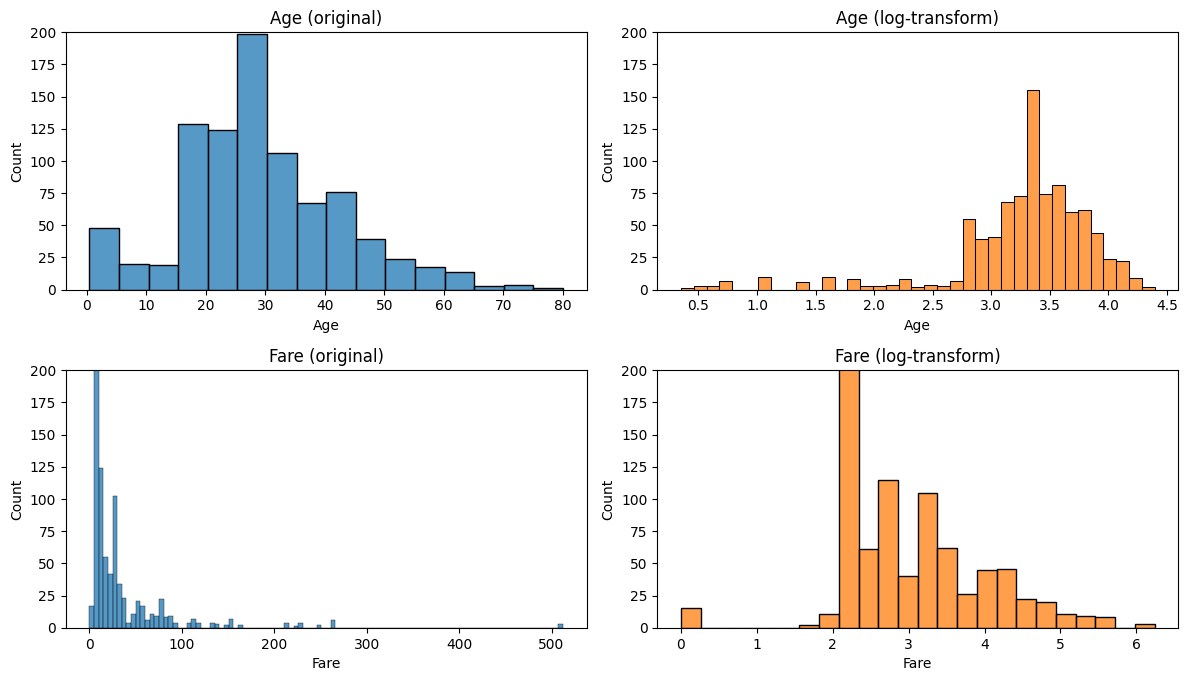

In [257]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['Age', 'Fare']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X_process[col], binwidth=5)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X_process[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [258]:
# Columns with missing values
na_cols=X_process.columns[X_process.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(X_process[na_cols].isna().sum(), columns=['Number_missing'])
mv

,Number_missing


In [259]:
# Apply log transform
for col in ['Age', 'Fare']:
    X_process[col]=np.log(1+X_process[col])
    X_process_test[col]=np.log(1+X_process_test[col])

In [260]:
# Indentify numerical and categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


numerical_cols = [cname for cname in X_process.columns if X_process[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X_process.columns if X_process[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X_process = ct.fit_transform(X_process)
X_process_test = ct.transform(X_process_test)

# Print new shape
print('Training set shape:', X_process.shape)

Training set shape: (891, 10)


In [261]:
#create train test split

X_train, X_valid, y_train, y_valid = train_test_split(X_process,y,stratify=y,train_size=0.7,test_size=0.3,random_state=0)

In [262]:
print(X_process.shape)
print(X_train.shape)

(891, 10)
(623, 10)


In [263]:
from sklearn.metrics import roc_auc_score

param_gridrf = {
    'n_estimators': [150, 200, 250, 300, 350, 400],
    'max_depth': [5, 7, 9, 11, 13],
    'criterion': ['gini', 'entropy', 'log_loss'],
}
param_gridsvc = { 
    'C':[10, 20, 40],
    'gamma': [1,0.1,0.01,0.001], 
    'degree' : [1,2,3,4,5,6]
}
param_gridknn = {
    'n_neighbors': [5, 10, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree']
}


rf = RandomForestClassifier()
svc = SVC(kernel='rbf')
knn = KNeighborsClassifier()

gsrf = GridSearchCV(estimator=rf, param_grid=param_gridrf, scoring='accuracy', cv=5)
gssvc = GridSearchCV(estimator=svc, param_grid=param_gridsvc, scoring='accuracy', cv=5)
gsknn = GridSearchCV(estimator=knn, param_grid=param_gridknn, scoring='accuracy', cv=5)



gsrf.fit(X_train, y_train)
gssvc.fit(X_train, y_train)
gsknn.fit(X_train, y_train)
gsparams = gsrf.best_params_
gssvcparams = gssvc.best_params_
gsknnparams = gsknn.best_params_

gsparams, gssvcparams, gsknnparams


({'criterion': 'gini', 'max_depth': 11, 'n_estimators': 400},
 {'C': 20, 'degree': 1, 'gamma': 0.01},
 {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'})

In [264]:
rfbase = RandomForestClassifier(random_state=0)
rfbasemodel = rfbase.fit(X_train, y_train)
predsbase = rfbasemodel.predict(X_valid)

rfgsoptimized = RandomForestClassifier(**gsparams, random_state=0)
rfmodel = rfgsoptimized.fit(X_train, y_train)

svc = SVC(**gssvcparams, random_state=0)
svcmodel = svc.fit(X_train, y_train)

knn = KNeighborsClassifier(**gsknnparams)
knnmodel = knn.fit(X_train, y_train)

predsgs = rfmodel.predict(X_valid)
predssvc = svcmodel.predict(X_valid)
predsknn = knnmodel.predict(X_valid)

def scores(name, preds, y_valid):
    rfacc = accuracy_score(y_true=y_valid, y_pred=preds)
    rfpre = f1_score(y_true=y_valid, y_pred=preds)
    rfrocauc = roc_auc_score(y_true=y_valid, y_score=preds)
    print(name, rfacc, rfpre, rfrocauc)
    
scores("rfbase: ", preds=predsbase, y_valid=y_valid)
scores("rfgs: ", preds=predsgs, y_valid=y_valid)
scores("svc: ", preds=predssvc, y_valid=y_valid)
scores("knn: ", preds=predsknn, y_valid=y_valid)


rfbase:  0.832089552238806 0.7619047619047619 0.8070903206825537
rfgs:  0.835820895522388 0.7659574468085106 0.8101206237128569
svc:  0.8395522388059702 0.7724867724867724 0.8149749926448956
knn:  0.8097014925373134 0.7411167512690355 0.7907325684024714


After Hyperparameter tuning, the results are improved, KNN isnt so good for this, doing the prediction on less features are similar in quality to the processed version. I don't know how to engineer features :D

I'll use the cut version to get the submission

Fit to the base data set

In [265]:
gsrf.fit(X_process, y)
rfoptim = RandomForestClassifier(**gsrf.best_params_, random_state=1)
rfoptimmodel = rfoptim.fit(X_process, y)

predsprocessed = rfoptimmodel.predict(X_process_test)
gsrf.best_params_

{'criterion': 'log_loss', 'max_depth': 11, 'n_estimators': 250}

In [266]:

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predsprocessed})
output.to_csv('submissionprocessed.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
